Basic Statistics:
       Hydrogen (ppm)  Methane (ppm)  Acetylene (ppm)  Ethylene (ppm)  \
count       28.000000      28.000000             28.0       28.000000   
mean        12.685714      19.664286              0.0        4.528571   
std          0.228869       1.020971              0.0        0.210567   
min         12.200000      17.700000              0.0        4.200000   
25%         12.600000      18.850000              0.0        4.375000   
50%         12.700000      19.550000              0.0        4.500000   
75%         12.800000      20.500000              0.0        4.700000   
max         13.200000      21.300000              0.0        4.900000   

       Ethane (ppm)  Carbon Monoxide (ppm)  Carbon Dioxide (ppm)  \
count     28.000000              28.000000             28.000000   
mean      18.596429             443.682143           1223.464286   
std        0.755955               8.890322             39.055025   
min       16.600000             429.700000          

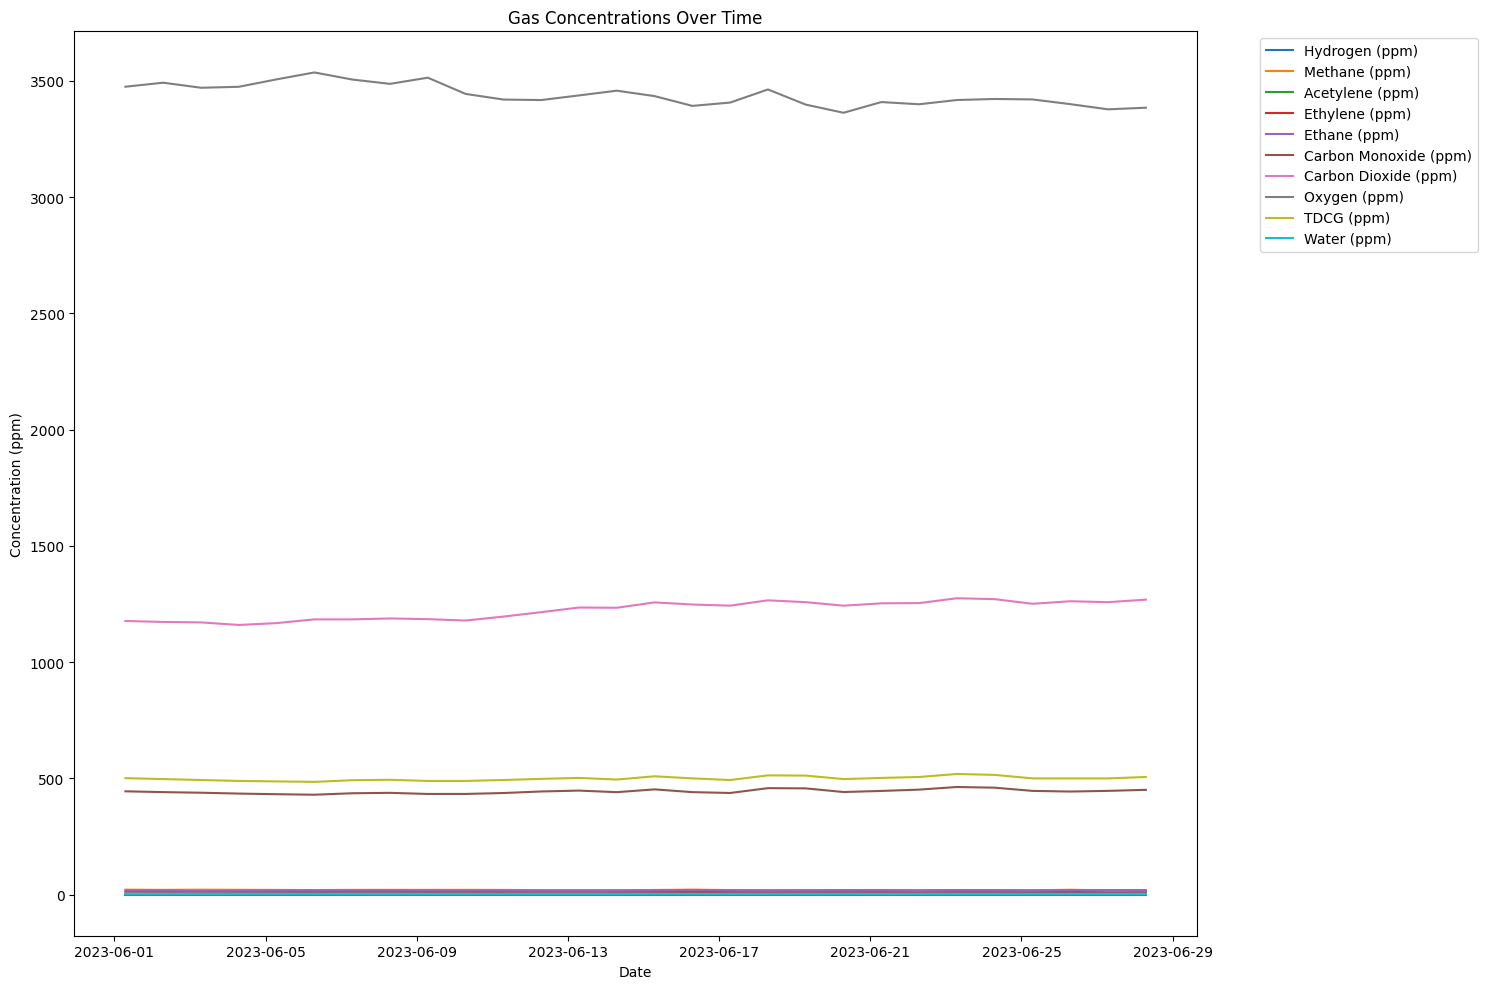

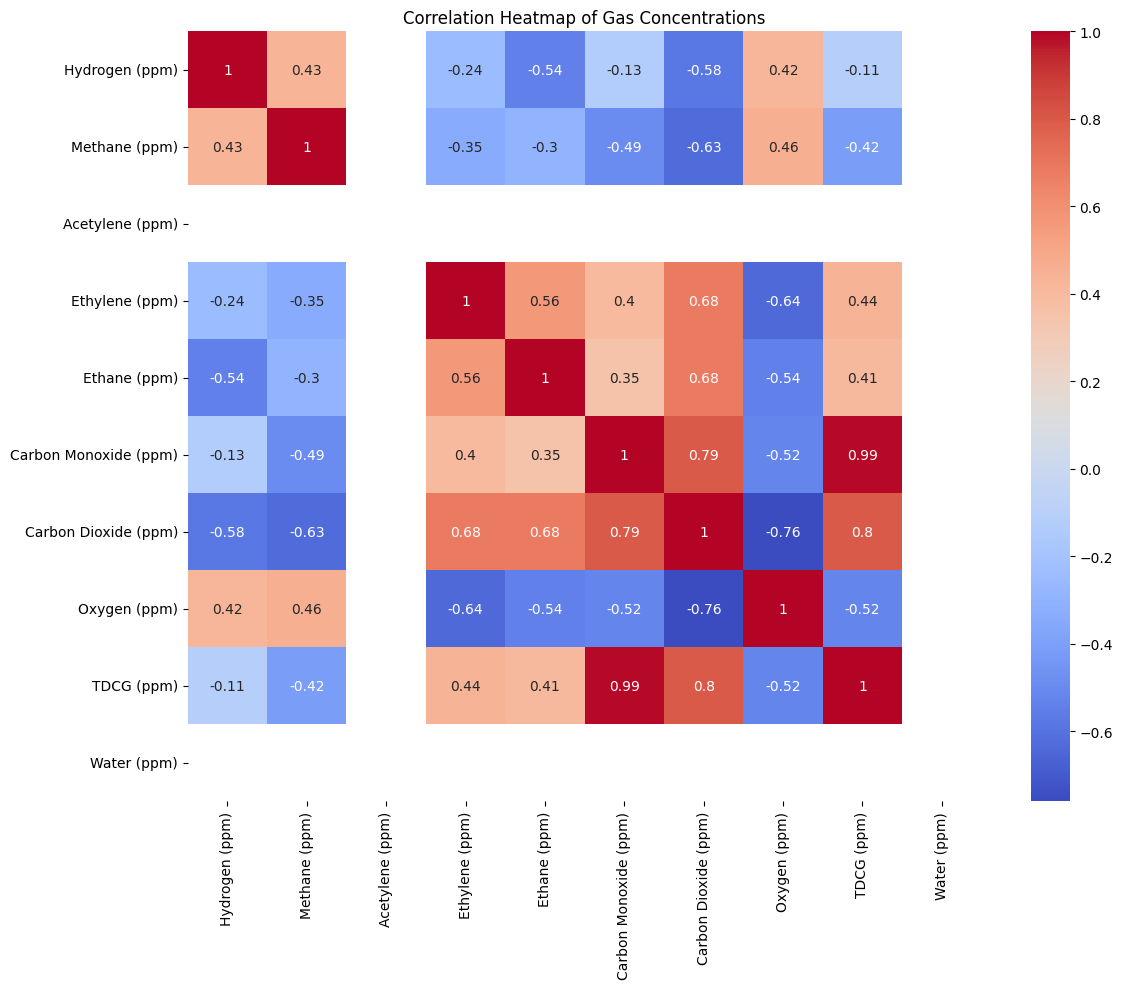


Trends and Anomalies:
Hydrogen (ppm): Increasing trend. Average daily change: 0.03 ppm
  Anomalies detected on: 2023-06-25, 2023-06-01

Methane (ppm): Increasing trend. Average daily change: 0.11 ppm
  No significant anomalies detected.

Acetylene (ppm): Decreasing trend. Average daily change: 0.00 ppm
  No significant anomalies detected.

Ethylene (ppm): Decreasing trend. Average daily change: -0.01 ppm
  No significant anomalies detected.

Ethane (ppm): Decreasing trend. Average daily change: -0.06 ppm
  Anomalies detected on: 2023-06-03

Carbon Monoxide (ppm): Decreasing trend. Average daily change: -0.24 ppm
  Anomalies detected on: 2023-06-23

Carbon Dioxide (ppm): Decreasing trend. Average daily change: -3.41 ppm
  No significant anomalies detected.

Oxygen (ppm): Increasing trend. Average daily change: 3.34 ppm
  Anomalies detected on: 2023-06-06

TDCG (ppm): Decreasing trend. Average daily change: -0.19 ppm
  Anomalies detected on: 2023-06-23

Water (ppm): Decreasing trend. Av

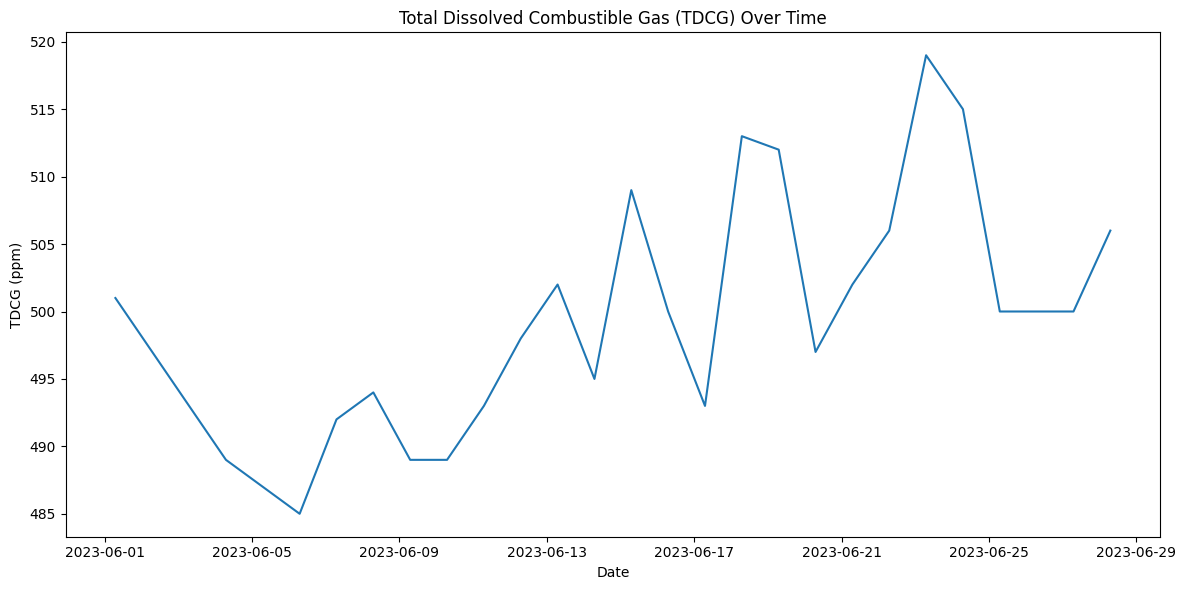

TDCG Analysis:
Average TDCG: 499.14 ppm
Maximum TDCG: 519.00 ppm on 2023-06-23
Minimum TDCG: 485.00 ppm on 2023-06-06


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('at1a2.csv')

# Convert Timestamp to datetime, handling both formats
def parse_timestamp(ts):
    try:
        return pd.to_datetime(ts, format='%d/%m/%Y %I:%M:%S %p')
    except ValueError:
        return pd.to_datetime(ts, format='%d/%m/%Y %H:%M')

df['Timestamp'] = df['Timestamp'].apply(parse_timestamp)


# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Calculate basic statistics
stats = df.describe()
print("Basic Statistics:")
print(stats)

# Plot time series for each gas
gases = ['Hydrogen (ppm)', 'Methane (ppm)', 'Acetylene (ppm)', 'Ethylene (ppm)', 'Ethane (ppm)', 'Carbon Monoxide (ppm)', 'Carbon Dioxide (ppm)', 'Oxygen (ppm)', 'TDCG (ppm)', 'Water (ppm)']

plt.figure(figsize=(15, 10))
for gas in gases:
    plt.plot(df.index, df[gas], label=gas)

plt.title('Gas Concentrations Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (ppm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[gases].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Gas Concentrations')
plt.tight_layout()
plt.show()

# Check for any trends or anomalies
print("\nTrends and Anomalies:")
for gas in gases:
    trend = df[gas].diff().mean()
    print(f"{gas}: {'Increasing' if trend > 0 else 'Decreasing'} trend. Average daily change: {trend:.2f} ppm")
    
    anomalies = df[(df[gas] > df[gas].mean() + 2*df[gas].std()) | (df[gas] < df[gas].mean() - 2*df[gas].std())]
    if not anomalies.empty:
        print(f"  Anomalies detected on: {', '.join(anomalies.index.strftime('%Y-%m-%d'))}")
    else:
        print("  No significant anomalies detected.")
    print()

# TDCG analysis
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TDCG (ppm)'])
plt.title('Total Dissolved Combustible Gas (TDCG) Over Time')
plt.xlabel('Date')
plt.ylabel('TDCG (ppm)')
plt.tight_layout()
plt.show()

print("TDCG Analysis:")
print(f"Average TDCG: {df['TDCG (ppm)'].mean():.2f} ppm")
print(f"Maximum TDCG: {df['TDCG (ppm)'].max():.2f} ppm on {df['TDCG (ppm)'].idxmax().strftime('%Y-%m-%d')}")
print(f"Minimum TDCG: {df['TDCG (ppm)'].min():.2f} ppm on {df['TDCG (ppm)'].idxmin().strftime('%Y-%m-%d')}")


Finding optimal ARIMA parameters...


c:\Users\daniel_nguy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\daniel_nguy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimal ARIMA parameters: (0, 1, 2)
Root Mean Squared Error: 5.76


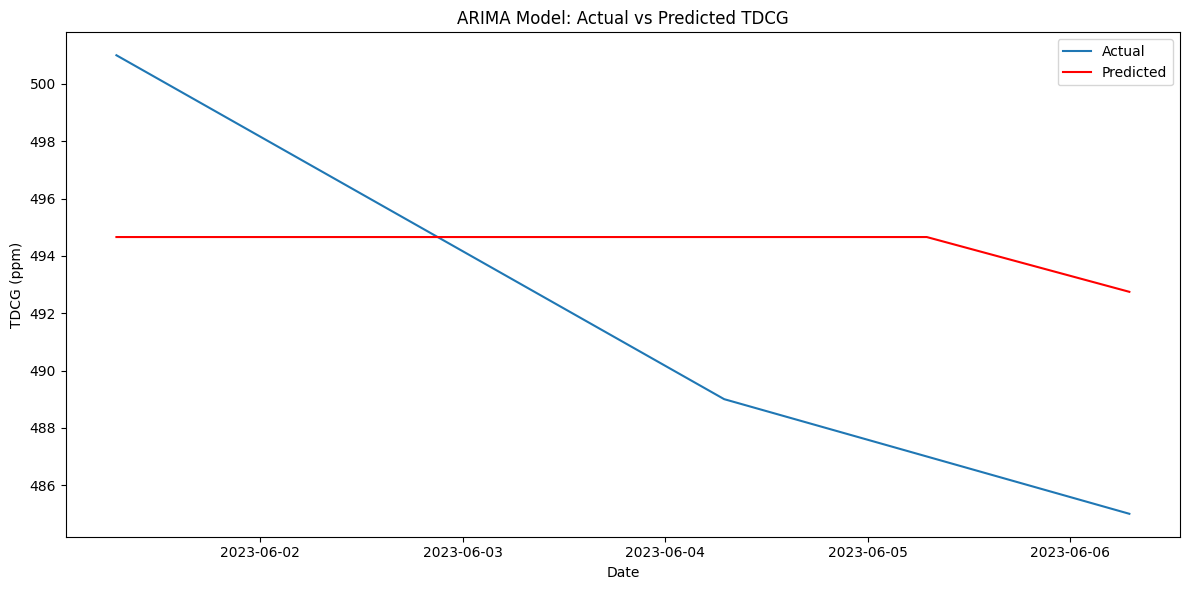


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -71.592
Date:                Wed, 16 Oct 2024   AIC                            149.185
Time:                        15:09:13   BIC                            152.318
Sample:                             0   HQIC                           149.865
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1642      0.319     -0.514      0.607      -0.790       0.461
ma.L2         -0.5214      0.235     -2.223      0.026      -0.981      -0.062
sigma2        51.6357     20.6

In [3]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for ARIMA modeling
tdcg_data = df['TDCG (ppm)'].values
train_size = int(len(tdcg_data) * 0.8)
train, test = tdcg_data[:train_size], tdcg_data[train_size:]

# Function to find optimal ARIMA parameters
def optimize_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_params = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_params = (p, d, q)
                except:
                    continue
    return best_params

# Find optimal parameters
print("Finding optimal ARIMA parameters...")
best_params = optimize_arima(train, range(0, 3), range(0, 2), range(0, 3))
print(f"Optimal ARIMA parameters: {best_params}")

# Train the ARIMA model with optimal parameters
model = ARIMA(train, order=best_params)
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(test):], test, label='Actual')
plt.plot(df.index[-len(test):], predictions, color='red', label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted TDCG')
plt.xlabel('Date')
plt.ylabel('TDCG (ppm)')
plt.legend()
plt.tight_layout()
plt.show()

# Print model summary
print("\nARIMA Model Summary:")
print(results.summary())

# Make future predictions
future_steps = 7  # Predict for the next 7 days
future_predictions = results.forecast(steps=future_steps)

print("\nFuture TDCG Predictions:")
for i, prediction in enumerate(future_predictions):
    future_date = df.index[-1] + pd.Timedelta(days=i+1)
    print(f"{future_date.strftime('%Y-%m-%d')}: {prediction:.2f} ppm")
